# MAKE TYPE BARPLOTS
The objective of this script is to generate stacked barplots to visualize how many ARGs and MGEs of each type were detected in the different sampling sites

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from met_brewer import met_brew
warnings.filterwarnings("ignore")

In [2]:
# Current wd: the script directory
os.chdir("../data/clean_data") #data directory
data_dir = os.getcwd()
os.chdir("../../results/fam_count") # general results dir for these analysis
bar_dir = os.getcwd()
print(os.getcwd())

/home/pak/Desktop/ARG-L/resistome/results/fam_count


In [3]:
os.chdir(data_dir)
all_data = pd.read_csv("ab_data_simple_fixed.csv", index_col = 0)

all_data.loc[all_data["antib"] == "Phenicol", "antib"] = "Amphenicol"

# Fix a bunch of badly assigned resistances 
all_data.loc[all_data["antib"] == "Other", "or_seq"] = "arg"
all_data.loc[all_data["Assay"] == "dfrA1", "antib"] = "Trimethoprim"
all_data.loc[all_data["Assay"] == "dfrA12", "antib"] = "Trimethoprim"
all_data.loc[all_data["Assay"] == "dfrA1", "or_seq"] = "arg"
all_data.loc[all_data["Assay"] == "dfrA12", "or_seq"] = "arg"

all_data.loc[all_data["type_g"] == "plastic", "type_g"] = "Plastic"
all_data.loc[all_data["type_g"] == "control", "type_g"] = "Surrounding\nenvironment"
all_data.loc[all_data["place"] == "ardley", "place"] = "Ardley"
all_data.loc[all_data["place"] == "ion", "place"] = "Lake\nIonosférico"
all_data.loc[all_data["place"] == "uru", "place"] = "Lake\nUruguay"

all_data.rename(columns = {"antib":"ARG type"}, inplace = True)
all_data.head()

all_data.head()

,Assay,ARG type,sample,Ct,place,type_f,type_g,or_seq,rel_n,rel_ab,log_n,rel_16
0,aacC2,Aminoglycoside,25.0,23.78,Ardley,PUR,Plastic,arg,9.246982,0.000222,-3.654,41686.938347
1,aacA/aphD,Aminoglycoside,25.0,26.05,Ardley,PUR,Plastic,arg,1.927525,0.000046,-4.335,41686.938347
2,aac(6')-II,Aminoglycoside,25.0,18.80,Ardley,PUR,Plastic,arg,288.403150,0.006918,-2.160,41686.938347
5,aac(6')-Ib,Aminoglycoside,25.0,15.27,Ardley,PUR,Plastic,arg,3303.695410,0.079250,-1.101,41686.938347
6,aadA2a,Aminoglycoside,25.0,17.66,Ardley,PUR,Plastic,arg,633.869711,0.015205,-1.818,41686.938347


In [4]:
all_data["hacky"] = all_data["place"] + "\n" + all_data["type_g"]
#all_data.head()
lolo = all_data.groupby(["place", "type_g", "hacky", "ARG type", "or_seq", "Assay"])["rel_n"].mean()
all_data = lolo.reset_index()
arg_counts = all_data.loc[all_data["or_seq"] == "arg"].groupby(["place", "type_g", "hacky"])["ARG type"].value_counts()
lala = arg_counts.reset_index()
os.chdir(bar_dir)
lala.to_csv("fam_counts.csv")

In [5]:
ardley_data = lala.loc[lala["place"] == "Ardley"]
ardley_data.sort_values(by = "ARG type", inplace = True)
ardley_data.head()

,place,type_g,hacky,ARG type,count
0,Ardley,Plastic,Ardley\nPlastic,Aminoglycoside,58
14,Ardley,Surrounding\nenvironment,Ardley\nSurrounding\nenvironment,Aminoglycoside,31
17,Ardley,Surrounding\nenvironment,Ardley\nSurrounding\nenvironment,Amphenicol,10
6,Ardley,Plastic,Ardley\nPlastic,Amphenicol,17
1,Ardley,Plastic,Ardley\nPlastic,Beta Lactam,47


In [6]:
colors = met_brew(name="Redon", n=11, brew_type="discrete")

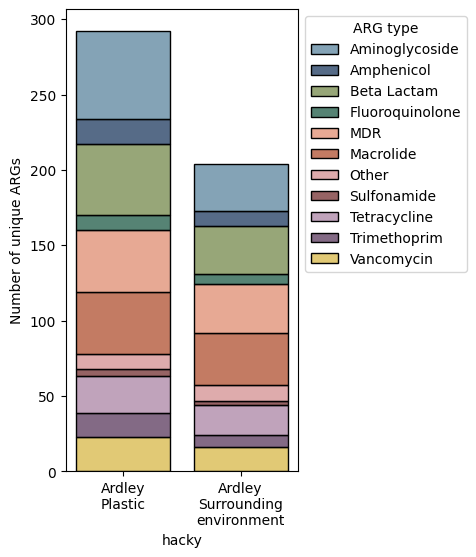

In [7]:
os.chdir(bar_dir)
ardley_data.loc[ardley_data["ARG type"] == "MLSB", "ARG type"] = "Macrolide"
fig, ax = plt.subplots(figsize = (3,6))
ax = sns.histplot(ardley_data, x = "hacky", hue = "ARG type", weights = "count", multiple = "stack", palette = colors, shrink = 0.8)
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
#plt.xticks(rotation=20)
# Change the axis labels
ax.set_ylabel("Number of unique ARGs")

plt.savefig("Type_counts_ARD.png", bbox_inches = "tight", dpi = 1600)

I'm making the lake figure after knowing which resistances will be present in lake samples. That means that I will be able to manually select which colors to use to make them consistent with the ones employed in the Ardley figure

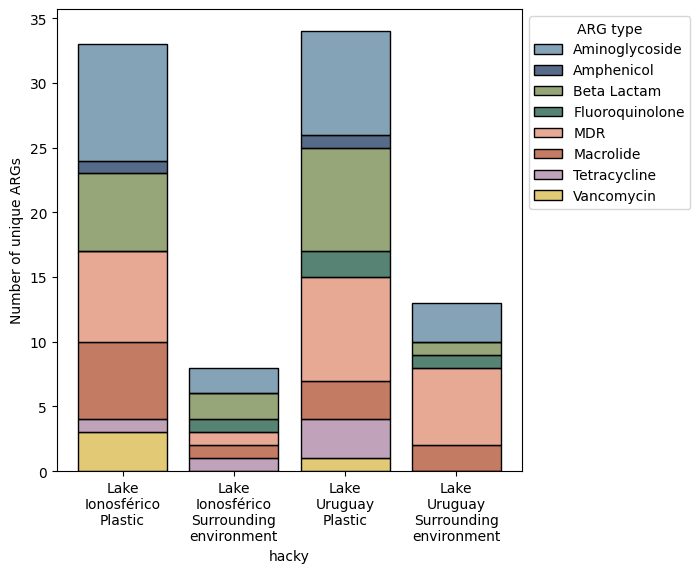

In [8]:
colors = ['#5b859e', # Aminoglycoside
 '#1e395f', # Amphenicol
 '#75884b', # Beta Lactam
 '#1e5a46', # Fluoroquinolone
 '#df8d71', # MDR
 '#af4f2f', # MLSB
 '#ab84a5', # Tetracycline
 '#d8b847'] # Vancomycin

lake_data = lala.loc[(lala["place"] == "Lake\nIonosférico") | (lala["place"] == "Lake\nUruguay")]
lake_data.loc[lake_data["ARG type"] == "MLSB", "ARG type"] = "Macrolide"
#lake_data.sort_values(by = "hacky", inplace = True)
os.chdir(bar_dir)
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.histplot(lake_data, x = "hacky", hue = "ARG type", weights = "count", multiple = "stack", palette = colors, shrink = 0.8, 
                  hue_order = ["Aminoglycoside", "Amphenicol", "Beta Lactam", "Fluoroquinolone", "MDR", "Macrolide", "Tetracycline", "Vancomycin"])
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
#plt.xticks(rotation=20)
# Change the axis labels
ax.set_ylabel("Number of unique ARGs")

plt.savefig("Type_counts_LAKE.png", bbox_inches = "tight")

In [9]:
# Get the MGE data
mge_counts = all_data.loc[all_data["or_seq"] == "mge"].groupby(["place", "type_g", "hacky"])["ARG type"].value_counts()
lala = mge_counts.reset_index()
# Change the name of this column to make it reflect the changed biological data it contains
lala.rename(columns = {"ARG type": "MGE type"}, inplace = True)
# And group all plasmids together
lala.loc[lala["MGE type"] == "Plasmid-inc", "MGE type"] = "Plasmid"
print(lala["MGE type"].unique())
lala.tail()

['MGE' 'Transposase' 'Insertional' 'Plasmid' 'Integrase']


,place,type_g,hacky,MGE type,count
24,Lake\nUruguay,Plastic,Lake\nUruguay\nPlastic,Transposase,1
25,Lake\nUruguay,Surrounding\nenvironment,Lake\nUruguay\nSurrounding\nenvironment,Insertional,2
26,Lake\nUruguay,Surrounding\nenvironment,Lake\nUruguay\nSurrounding\nenvironment,Integrase,2
27,Lake\nUruguay,Surrounding\nenvironment,Lake\nUruguay\nSurrounding\nenvironment,Plasmid,1
28,Lake\nUruguay,Surrounding\nenvironment,Lake\nUruguay\nSurrounding\nenvironment,Plasmid,1


In [10]:
# Get the Ardley data to represent it by separate, as otherwise the scale is all wack
ardley_data = lala.loc[lala["place"] == "Ardley"]
ardley_data.sort_values(by = "MGE type", inplace = True)
ardley_data.head()

,place,type_g,hacky,MGE type,count
2,Ardley,Plastic,Ardley\nPlastic,Insertional,9
7,Ardley,Surrounding\nenvironment,Ardley\nSurrounding\nenvironment,Insertional,6
4,Ardley,Plastic,Ardley\nPlastic,Integrase,4
10,Ardley,Surrounding\nenvironment,Ardley\nSurrounding\nenvironment,Integrase,2
0,Ardley,Plastic,Ardley\nPlastic,MGE,21


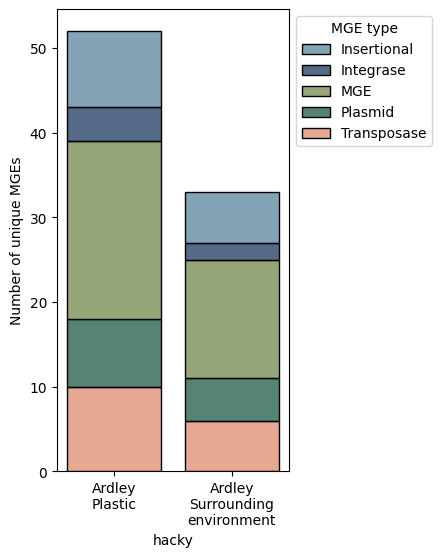

In [11]:
fig, ax = plt.subplots(figsize = (3,6))
ax = sns.histplot(ardley_data, x = "hacky", hue = "MGE type", weights = "count", multiple = "stack", palette = colors, shrink = 0.8)
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
#plt.xticks(rotation=20)
# Change the axis labels
ax.set_ylabel("Number of unique MGEs")

plt.savefig("Type_counts_ARD_MGE.png", bbox_inches = "tight", dpi = 1800)

In [12]:
# Get the lake data to represent it by separate, as otherwise the scale is all wack
lake_data = lala.loc[lala["place"] != "Ardley"]
lake_data.sort_values(by = "MGE type", inplace = True)
lake_data.head()

,place,type_g,hacky,MGE type,count
20,Lake\nUruguay,Plastic,Lake\nUruguay\nPlastic,Insertional,3
14,Lake\nIonosférico,Plastic,Lake\nIonosférico\nPlastic,Insertional,1
25,Lake\nUruguay,Surrounding\nenvironment,Lake\nUruguay\nSurrounding\nenvironment,Insertional,2
13,Lake\nIonosférico,Plastic,Lake\nIonosférico\nPlastic,Integrase,2
26,Lake\nUruguay,Surrounding\nenvironment,Lake\nUruguay\nSurrounding\nenvironment,Integrase,2


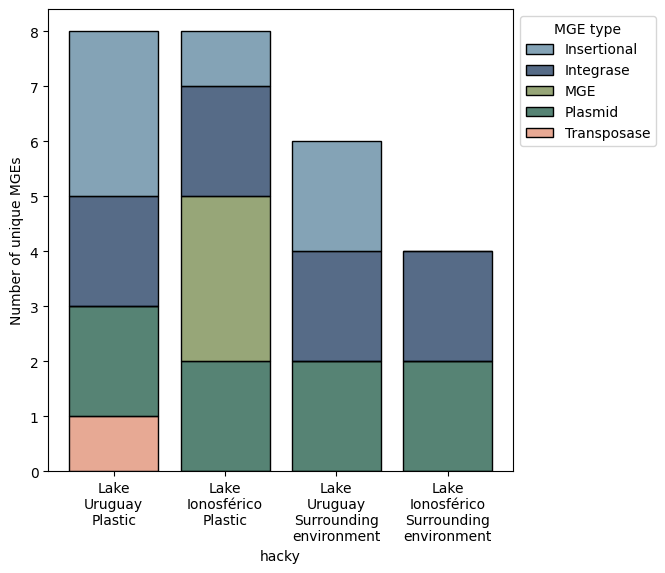

In [13]:
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.histplot(lake_data, x = "hacky", hue = "MGE type", weights = "count", multiple = "stack", palette = colors, shrink = 0.8,
                 hue_order = ["Insertional", "Integrase", "MGE", "Plasmid", "Transposase"])
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
#plt.xticks(rotation=20)
# Change the axis labels
ax.set_ylabel("Number of unique MGEs")

plt.savefig("Type_counts_LAKE_MGE.png", bbox_inches = "tight", dpi = 1800)

### Antibiotic type charts
There's an additional layer of complexity that has come up during the review process of the original paper: classifying the ARGs in terms of wether the antibiotic they give resistance against is synthetic, semi-synthetic or natural. 
So it's just a matter of manually making a new column which includes the classification. It will, however, mean looking at "Other" ARGs one by one.

In [14]:
# This should have been fixed before
all_data.loc[all_data["ARG type"] == "MLSB", "ARG type"] = "Macrolide"

# Here goes everything that isn't classified as "Other"
all_data.loc[all_data["ARG type"] == "Aminoglycoside", "synth"] = "Natural"
all_data.loc[all_data["ARG type"] == "Amphenicol", "synth"] = "Semi-synthetic"
all_data.loc[all_data["ARG type"] == "Beta Lactam", "synth"] = "Natural" #!
all_data.loc[all_data["ARG type"] == "Fluoroquinolone", "synth"] = "Synthetic"
all_data.loc[all_data["ARG type"] == "MDR", "synth"] = "Natural"
all_data.loc[all_data["ARG type"] == "Macrolide", "synth"] = "Natural" #!
all_data.loc[all_data["ARG type"] == "Sulfonamide", "synth"] = "Synthetic"
all_data.loc[all_data["ARG type"] == "Tetracycline", "synth"] = "Natural" #!
all_data.loc[all_data["ARG type"] == "Trimethoprim", "synth"] = "Synthetic"
all_data.loc[all_data["ARG type"] == "Vancomycin", "synth"] = "Natural"

# Here the "Other" ARGs get classified family by family
all_data.loc[(all_data["Assay"] == "ARR-3") | (all_data["Assay"] == "Arr2") , "synth"] = "Semi-synthetic"
all_data.loc[all_data["Assay"] == "bacA", "synth"] = "Natural"
all_data.loc[all_data["Assay"] == "fabK", "synth"] = "Synthetic"
all_data.loc[(all_data["Assay"] == "fosX") | (all_data["Assay"] == "fosb") , "synth"] = "Natural"
all_data.loc[(all_data["Assay"] == "mcr-1") | (all_data["Assay"] == "mcr-2") | (all_data["Assay"] == "pmrA") , "synth"] = "Natural"
all_data.loc[all_data["Assay"] == "nisB", "synth"] = "Natural"


In [15]:
# I repeat this out of laziness
all_data["hacky"] = all_data["place"] + "\n" + all_data["type_g"]
#all_data.head()
lolo = all_data.groupby(["place", "type_g", "hacky", "synth", "or_seq", "Assay"])["rel_n"].mean().reset_index()
arg_counts = lolo.loc[lolo["or_seq"] == "arg"].groupby(["place", "type_g", "hacky"])["synth"].value_counts()
lala = arg_counts.reset_index()

# Ardley data
ardley_data = lala.loc[lala["place"] == "Ardley"]
ardley_data.sort_values(by = "synth", inplace = True)

# Lake data
lake_data = lala.loc[lala["place"] != "Ardley"] 

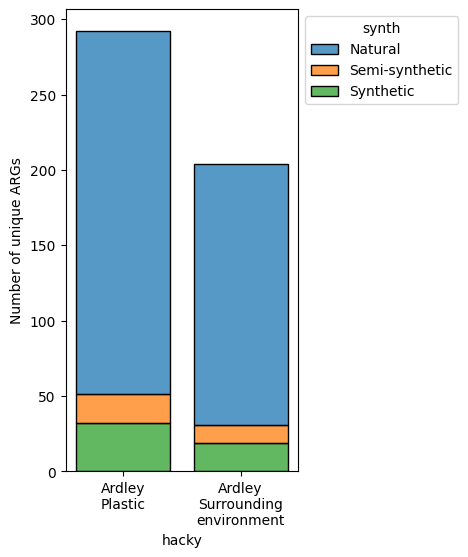

In [16]:
#os.chdir(bar_dir)
fig, ax = plt.subplots(figsize = (3,6))
ax = sns.histplot(ardley_data, x = "hacky", hue = "synth", weights = "count", multiple = "stack", shrink = 0.8)
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
#plt.xticks(rotation=20)
# Change the axis labels
ax.set_ylabel("Number of unique ARGs")

plt.savefig("Synth_counts_ARD.png", bbox_inches = "tight", dpi = 1600)

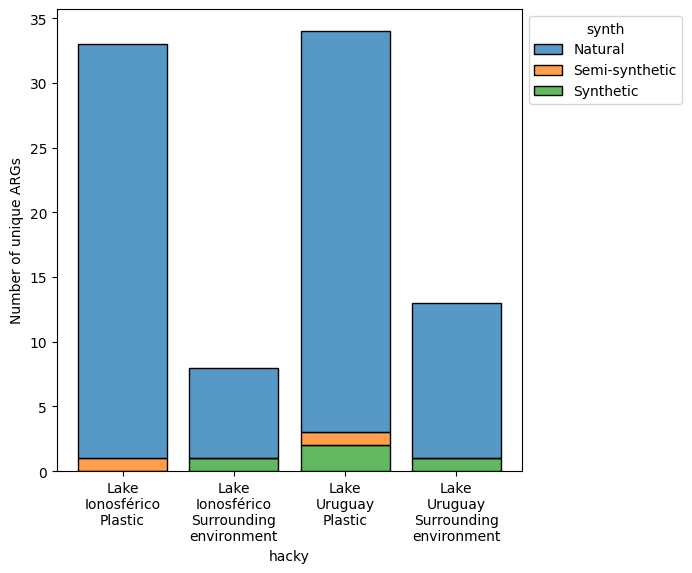

In [17]:
#os.chdir(bar_dir)
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.histplot(lake_data, x = "hacky", hue = "synth", weights = "count", multiple = "stack", shrink = 0.8)
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
#plt.xticks(rotation=20)
# Change the axis labels
ax.set_ylabel("Number of unique ARGs")

plt.savefig("Synth_counts_lake.png", bbox_inches = "tight", dpi = 1600)

I now have all my ARGs classified. However, the results as they are now just show the same result as before: there's more ARGs in plastics than in their surrounding environment. So I'm going to try to visualize these results in percentages, to check whether any differences appear that way

In [18]:
ardley_plas_total = ardley_data.loc[ardley_data["type_g"] == "Plastic"]["count"].sum()
#print(ardley_plas_total)
ard_plas_synth_pct = ardley_data.loc[(ardley_data["type_g"] == "Plastic") & (ardley_data["synth"] == "Synthetic")]["count"].sum() / ardley_plas_total
ard_plas_semi_pct = ardley_data.loc[(ardley_data["type_g"] == "Plastic") & (ardley_data["synth"] == "Semi-synthetic")]["count"].sum() / ardley_plas_total
ard_plas_natural_pct = ardley_data.loc[(ardley_data["type_g"] == "Plastic") & (ardley_data["synth"] == "Natural")]["count"].sum() / ardley_plas_total

ardley_cont_total = ardley_data.loc[ardley_data["type_g"] == "Surrounding\nenvironment"]["count"].sum()
#print(ardley_cont_total)
ard_cont_synth_pct = ardley_data.loc[(ardley_data["type_g"] == "Surrounding\nenvironment") & (ardley_data["synth"] == "Synthetic")]["count"].sum() / ardley_cont_total
ard_cont_semi_pct = ardley_data.loc[(ardley_data["type_g"] == "Surrounding\nenvironment") & (ardley_data["synth"] == "Semi-synthetic")]["count"].sum() / ardley_cont_total
ard_cont_natural_pct = ardley_data.loc[(ardley_data["type_g"] == "Surrounding\nenvironment") & (ardley_data["synth"] == "Natural")]["count"].sum() / ardley_cont_total

print("The pct of synthetic ardley plastic is: ", ard_plas_synth_pct * 100)
print("The pct of semi ardley plastic is: ",ard_plas_semi_pct * 100)
print("The pct of natural ardley plastic is: ",ard_plas_natural_pct * 100)
print("")
print("The pct of synthetic ardley control is: ",ard_cont_synth_pct * 100)
print("The pct of semi ardley control is: ",ard_cont_semi_pct * 100)
print("The pct of natural ardley control is: ",ard_cont_natural_pct * 100)

The pct of synthetic ardley plastic is:  10.95890410958904
The pct of semi ardley plastic is:  6.506849315068493
The pct of natural ardley plastic is:  82.53424657534246

The pct of synthetic ardley control is:  9.313725490196079
The pct of semi ardley control is:  5.88235294117647
The pct of natural ardley control is:  84.80392156862744


In [19]:
lake_plas_total = lake_data.loc[lake_data["type_g"] == "Plastic"]["count"].sum()
#print(lake_plas_total)
lake_plas_synth_pct = lake_data.loc[(lake_data["type_g"] == "Plastic") & (lake_data["synth"] == "Synthetic")]["count"].sum() / lake_plas_total
lake_plas_semi_pct = lake_data.loc[(lake_data["type_g"] == "Plastic") & (lake_data["synth"] == "Semi-synthetic")]["count"].sum() / lake_plas_total
lake_plas_natural_pct = lake_data.loc[(lake_data["type_g"] == "Plastic") & (lake_data["synth"] == "Natural")]["count"].sum() / lake_plas_total

lake_cont_total = lake_data.loc[lake_data["type_g"] == "Surrounding\nenvironment"]["count"].sum()
#print(lake_cont_total)
lake_cont_synth_pct = lake_data.loc[(lake_data["type_g"] == "Surrounding\nenvironment") & (lake_data["synth"] == "Synthetic")]["count"].sum() / lake_cont_total
lake_cont_semi_pct = lake_data.loc[(lake_data["type_g"] == "Surrounding\nenvironment") & (lake_data["synth"] == "Semi-synthetic")]["count"].sum() / lake_cont_total
lake_cont_natural_pct = lake_data.loc[(lake_data["type_g"] == "Surrounding\nenvironment") & (lake_data["synth"] == "Natural")]["count"].sum() / lake_cont_total

print("The pct of synthetic lake plastic is: ", lake_plas_synth_pct * 100)
print("The pct of semi lake plastic is: ", lake_plas_semi_pct * 100)
print("The pct of natural lake plastic is: ", lake_plas_natural_pct * 100)
print("")
print("The pct of synthetic lake control is: ", lake_cont_synth_pct * 100)
print("The pct of semi lake control is: ", lake_cont_semi_pct * 100)
print("The pct of natural lake control is: ", lake_cont_natural_pct * 100)

The pct of synthetic lake plastic is:  2.9850746268656714
The pct of semi lake plastic is:  2.9850746268656714
The pct of natural lake plastic is:  94.02985074626866

The pct of synthetic lake control is:  9.523809523809524
The pct of semi lake control is:  0.0
The pct of natural lake control is:  90.47619047619048


I now need to make a dataframe in a format which seaborn can work with

In [20]:
# It's really important to keep the order established when declaring this list in the rest of lists
df_count_lst = [ard_plas_synth_pct, ard_plas_semi_pct, ard_plas_natural_pct, ard_cont_synth_pct, ard_cont_semi_pct, ard_cont_natural_pct, lake_plas_synth_pct, lake_plas_semi_pct, lake_plas_natural_pct, lake_cont_synth_pct, lake_cont_semi_pct, lake_cont_natural_pct]
df_places_lst = ["Ardley"] * 6
df_places_lst = df_places_lst + ["Lakes"] * 6 
df_synth_lst = ["Synthetic", "Semi-synthetic", "Natural"] * 4
df_typeg_lst = ["Plastic"] * 3
df_typeg_lst = df_typeg_lst + ["Surrounding\nenvironment"] * 3
df_typeg_lst = df_typeg_lst * 2
df_dict = {"count": df_count_lst, "Sampling areas": df_places_lst, "ARG type": df_synth_lst, "Sample type": df_typeg_lst}

synth_df = pd.DataFrame(df_dict)
synth_df["hacky"] = synth_df["Sampling areas"] + "\n" + synth_df["Sample type"]
synth_df["count"] = synth_df["count"]*100 
synth_df

,count,Sampling areas,ARG type,Sample type,hacky
0,10.958904,Ardley,Synthetic,Plastic,Ardley\nPlastic
1,6.506849,Ardley,Semi-synthetic,Plastic,Ardley\nPlastic
2,82.534247,Ardley,Natural,Plastic,Ardley\nPlastic
3,9.313725,Ardley,Synthetic,Surrounding\nenvironment,Ardley\nSurrounding\nenvironment
4,5.882353,Ardley,Semi-synthetic,Surrounding\nenvironment,Ardley\nSurrounding\nenvironment
5,84.803922,Ardley,Natural,Surrounding\nenvironment,Ardley\nSurrounding\nenvironment
6,2.985075,Lakes,Synthetic,Plastic,Lakes\nPlastic
7,2.985075,Lakes,Semi-synthetic,Plastic,Lakes\nPlastic
8,94.029851,Lakes,Natural,Plastic,Lakes\nPlastic
9,9.523810,Lakes,Synthetic,Surrounding\nenvironment,Lakes\nSurrounding\nenvironment


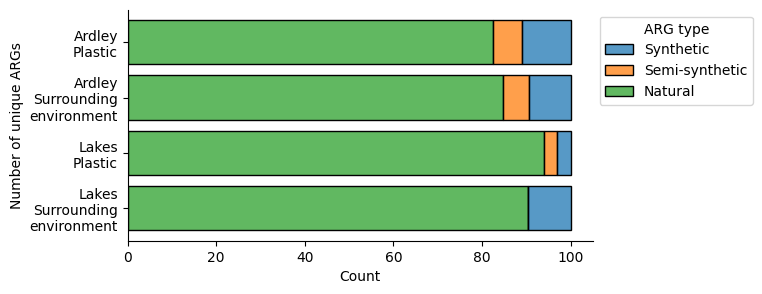

In [21]:
fig, ax = plt.subplots(figsize = (6,3))
ax = sns.histplot(synth_df, y = "hacky", hue = "ARG type", weights = "count", multiple = "stack", shrink = 0.8)
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
#plt.xticks(rotation=20)
# Change the axis labels
ax.set_ylabel("Number of unique ARGs")
sns.despine()
plt.savefig("Synth_PCTS.png", bbox_inches = "tight", dpi = 1600)

In [22]:
# A list of all plastic exclusive ARGs to code for synthetic resistances
plas_synth_set = set(all_data.loc[(all_data["synth"] == "Synthetic") & (all_data["type_g"] == "Plastic")]["Assay"].unique())
control_synth_set = set(all_data.loc[(all_data["synth"] == "Synthetic") & (all_data["type_g"] == "Surrounding\nenvironment")]["Assay"].unique())
print("Plastic exclusive synthetic ARGs globally speaking")
print(plas_synth_set - control_synth_set)
# Same idea, but semi-synthetic
plas_semi_set = set(all_data.loc[(all_data["synth"] == "Semi-synthetic") & (all_data["type_g"] == "Plastic")]["Assay"].unique())
control_semi_set = set(all_data.loc[(all_data["synth"] == "Semi-synthetic") & (all_data["type_g"] == "Surrounding\nenvironment")]["Assay"].unique())
print("Plastic exclusive semi ARGs globally speaking")
print(plas_semi_set - control_semi_set)
print("")
# Repeat only for Ardley
ard_plas_synth_set = set(all_data.loc[(all_data["synth"] == "Synthetic") & (all_data["type_g"] == "Plastic") & (all_data["place"] == "Ardley")]["Assay"].unique())
ard_control_synth_set = set(all_data.loc[(all_data["synth"] == "Synthetic") & (all_data["type_g"] == "Surrounding\nenvironment") & (all_data["place"] == "Ardley")]["Assay"].unique())
print("Plastic exclusive synthetic ARGs Ardleyidlly speaking")
print(ard_plas_synth_set - ard_control_synth_set)
# Same idea, but semi-synthetic
ard_plas_semi_set = set(all_data.loc[(all_data["synth"] == "Semi-synthetic") & (all_data["type_g"] == "Plastic") & (all_data["place"] == "Ardley")]["Assay"].unique())
ard_control_semi_set = set(all_data.loc[(all_data["synth"] == "Semi-synthetic") & (all_data["type_g"] == "Surrounding\nenvironment") & (all_data["place"] == "Ardley")]["Assay"].unique())
print("Plastic exclusive semi ARGs Ardleyidlly speaking")
print(ard_plas_semi_set - ard_control_semi_set)
print("")
# Repeat only for Ionosférico
lake_plas_synth_set = set(all_data.loc[(all_data["synth"] == "Synthetic") & (all_data["type_g"] == "Plastic") & (all_data["place"] == "Lake\nIonosférico")]["Assay"].unique())
lake_control_synth_set = set(all_data.loc[(all_data["synth"] == "Synthetic") & (all_data["type_g"] == "Surrounding\nenvironment") & (all_data["place"] == "Lake\nIonosférico")]["Assay"].unique())
print("Plastic exclusive synthetic ARGs Ionosféricolly speaking")
print(lake_plas_synth_set - lake_control_synth_set)
# Same idea, but semi-synthetic
lake_plas_semi_set = set(all_data.loc[(all_data["synth"] == "Semi-synthetic") & (all_data["type_g"] == "Plastic") & (all_data["place"] == "Lake\nIonosférico")]["Assay"].unique())
lake_control_semi_set = set(all_data.loc[(all_data["synth"] == "Semi-synthetic") & (all_data["type_g"] == "Surrounding\nenvironment") & (all_data["place"] == "Lake\nIonosférico")]["Assay"].unique())
print("Plastic exclusive semi ARGs Ionosféricolly speaking")
print(lake_plas_semi_set - lake_control_semi_set)
print("")
# Repeat only for Ionosférico
lake_plas_synth_set = set(all_data.loc[(all_data["synth"] == "Synthetic") & (all_data["type_g"] == "Plastic") & (all_data["place"] == "Lake\nUruguay")]["Assay"].unique())
lake_control_synth_set = set(all_data.loc[(all_data["synth"] == "Synthetic") & (all_data["type_g"] == "Surrounding\nenvironment") & (all_data["place"] == "Lake\nUruguay")]["Assay"].unique())
print("Plastic exclusive synthetic ARGs Urugually speaking")
print(lake_plas_synth_set - lake_control_synth_set)
# Same idea, but semi-synthetic
lake_plas_semi_set = set(all_data.loc[(all_data["synth"] == "Semi-synthetic") & (all_data["type_g"] == "Plastic") & (all_data["place"] == "Lake\nUruguay")]["Assay"].unique())
lake_control_semi_set = set(all_data.loc[(all_data["synth"] == "Semi-synthetic") & (all_data["type_g"] == "Surrounding\nenvironment") & (all_data["place"] == "Lake\nUruguay")]["Assay"].unique())
print("Plastic exclusive semi ARGs Urugually speaking")
print(lake_plas_semi_set - lake_control_semi_set)

Plastic exclusive synthetic ARGs globally speaking
{'strB', 'sul1 NEW', 'dfrC', 'dfrA1', 'dfrA27', 'qnrD', 'dfrBmulti', 'QnrVC4_VC5_VC7', 'dfrA22', 'dfrA8', 'dfra17', 'dfrA12'}
Plastic exclusive semi ARGs globally speaking
{'catB3', 'qnrB-bob_resign', 'catA2', 'cmlA5', 'cmlV', 'catB8', 'cmx(A)'}

Plastic exclusive synthetic ARGs Ardleyidlly speaking
{'strB', 'sul1 NEW', 'dfrC', 'dfrA1', 'dfrA27', 'qepA_1_2', 'qnrD', 'dfrBmulti', 'QnrVC4_VC5_VC7', 'dfrA22', 'dfrA8', 'dfra17', 'dfrA12'}
Plastic exclusive semi ARGs Ardleyidlly speaking
{'catB3', 'qnrB-bob_resign', 'catA2', 'cmlA5', 'cmlV', 'catB8', 'cmx(A)'}

Plastic exclusive synthetic ARGs Ionosféricolly speaking
set()
Plastic exclusive semi ARGs Ionosféricolly speaking
{'ceoA'}

Plastic exclusive synthetic ARGs Urugually speaking
{'QnrB4'}
Plastic exclusive semi ARGs Urugually speaking
{'ceoA'}


In [23]:
all_data

,place,type_g,hacky,ARG type,or_seq,Assay,rel_n,synth
0,Ardley,Plastic,Ardley\nPlastic,Aminoglycoside,arg,Aac6-Aph2,18.578213,Natural
1,Ardley,Plastic,Ardley\nPlastic,Aminoglycoside,arg,ArmA,228.083615,Natural
2,Ardley,Plastic,Ardley\nPlastic,Aminoglycoside,arg,aac(3)-Xab,7088.429755,Natural
3,Ardley,Plastic,Ardley\nPlastic,Aminoglycoside,arg,aac(3)-ib,5503.960289,Natural
4,Ardley,Plastic,Ardley\nPlastic,Aminoglycoside,arg,aac(3)-id_ie,1780.407862,Natural
...,...,...,...,...,...,...,...,...
690,Lake\nUruguay,Surrounding\nenvironment,Lake\nUruguay\nSurrounding\nenvironment,MDR,arg,oprD,2.333655,Natural
691,Lake\nUruguay,Surrounding\nenvironment,Lake\nUruguay\nSurrounding\nenvironment,Macrolide,arg,erm(35),16.292960,Natural
692,Lake\nUruguay,Surrounding\nenvironment,Lake\nUruguay\nSurrounding\nenvironment,Macrolide,arg,mphA,10.185914,Natural
693,Lake\nUruguay,Surrounding\nenvironment,Lake\nUruguay\nSurrounding\nenvironment,Plasmid,mge,trb-C,18.491319,NaN


tab:blue : #1f77b4
tab:orange : #ff7f0e
tab:green : #2ca02c
tab:red : #d62728
tab:purple : #9467bd
tab:brown : #8c564b
tab:pink : #e377c2
tab:gray : #7f7f7f
tab:olive : #bcbd22
tab:cyan : #17becf
